# Exploratory data analysis

In [1]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pkg import utils
from pkg import data_vis

In [2]:
# Importing data

path = utils.get_parents() + r"/data/cleaned.csv"

df = pd.read_csv(path, index_col=0)
df.head()

,dominance_simpson,12DICHLORETHDEG-PWY,AEROBACTINSYN-PWY,ALLANTOINDEG-PWY,CRNFORCAT-PWY,DENITRIFICATION-PWY,DHGLUCONATE-PYR-CAT-PWY,DTDPRHAMSYN-PWY,METH-ACETATE-PWY,P108-PWY,...,bisq_9_mins_t1,bisq_sleep_prob_t1,ebia_tot_t1,educationLevelAhmedNum_t1,a10_t1,bmi_pregest_t1,ibq_reg_t1,ibq_soot_t1,ibq_dura_t1,bayley_3_t1
7,0.136112,0.0,0.000000,7.676483,0.0,0.000000,0.0,4395.178167,0.0,171.940413,...,239.0,1.0,0.0,16.0,3.0,32.36855,4.654762,5.857143,2.333333,100.0
8,0.451324,0.0,0.000000,14.984719,0.0,320.494755,0.0,4478.753445,0.0,43.380158,...,60.0,0.0,0.0,20.0,1.0,20.79673,4.626190,4.428571,3.600000,75.0
14,0.281675,0.0,209.593817,0.000000,0.0,0.000000,0.0,2755.525229,0.0,0.000000,...,30.0,0.0,0.0,16.0,1.0,21.36752,5.872024,5.571429,4.750000,95.0
24,0.945041,0.0,0.000000,0.000000,0.0,26.374059,0.0,2725.705501,0.0,50.368350,...,30.0,0.0,2.0,16.0,5.0,38.51406,5.684524,4.571429,5.000000,115.0
26,0.338783,0.0,0.000000,0.000000,0.0,0.000000,0.0,725.879153,0.0,0.000000,...,120.0,1.0,0.0,12.0,2.0,22.94812,5.369048,6.142857,3.000000,105.0


In [3]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

In [4]:
# Check correlation

correlations = []

for column in X.columns:
    corr = float(X[column].corr(y))
    correlations.append([column,corr])

In [5]:
# Adjusted limiar for only 6 features

limiar = 0.1

most_corr = []

for category in correlations:
    if category[1] > limiar or category[1] < -limiar:
        most_corr.append(category[0])

most_corr = most_corr[:6]

# print(X[most_correlated])

df_corr = pd.concat([y, X[most_corr]], axis=1)

df_corr.head()

,bayley_3_t1,DENITRIFICATION-PWY,PWY-6471,PWY-7198,PWY0-1533,URSIN-PWY,k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Coriobacteriales
7,100.0,0.000000,0.0,278.736048,0.0,0.0,2.80433
8,75.0,320.494755,0.0,1937.025673,0.0,0.0,0.00000
14,95.0,0.000000,0.0,1506.537830,0.0,0.0,0.00000
24,115.0,26.374059,0.0,0.000000,0.0,0.0,0.00000
26,105.0,0.000000,0.0,123.003244,0.0,0.0,0.00000


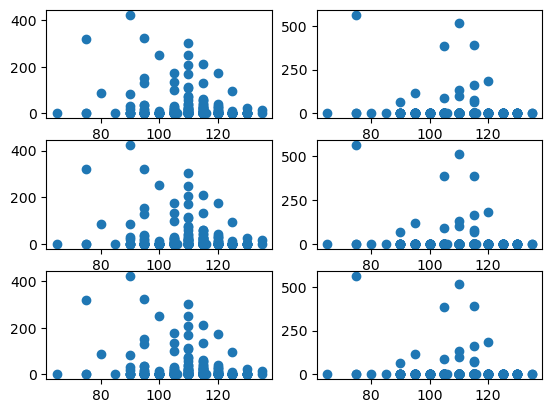

In [6]:
fig, axes = plt.subplots(3,2)

y = df_corr.iloc[:,0]

for row in range(3):
    for column in range(2):
        x_i = df_corr.iloc[:,column+1]
        axes[row, column].scatter(y, x_i)

plt.show()